# M² Fitting Examples

**Scott Prahl**

**Sept 2023**

This notebook describes the fitting procedure and shows five examples of how M² fitting by `laserbeamsize` produces beam parameters that match those made by others.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import laserbeamsize as lbs

## Example 1

Nice example from [RP Photonics](https://www.rp-photonics.com/beam_quality.html), but what is the wavelength?  If the XeCl excimer laser line at 308nm is chosen, then M² works out.

<img src="https://www.rp-photonics.com/img/caustic.png">

The vertical lines in the graph are the 1X and 2X the Rayleigh distance from the beam waist.

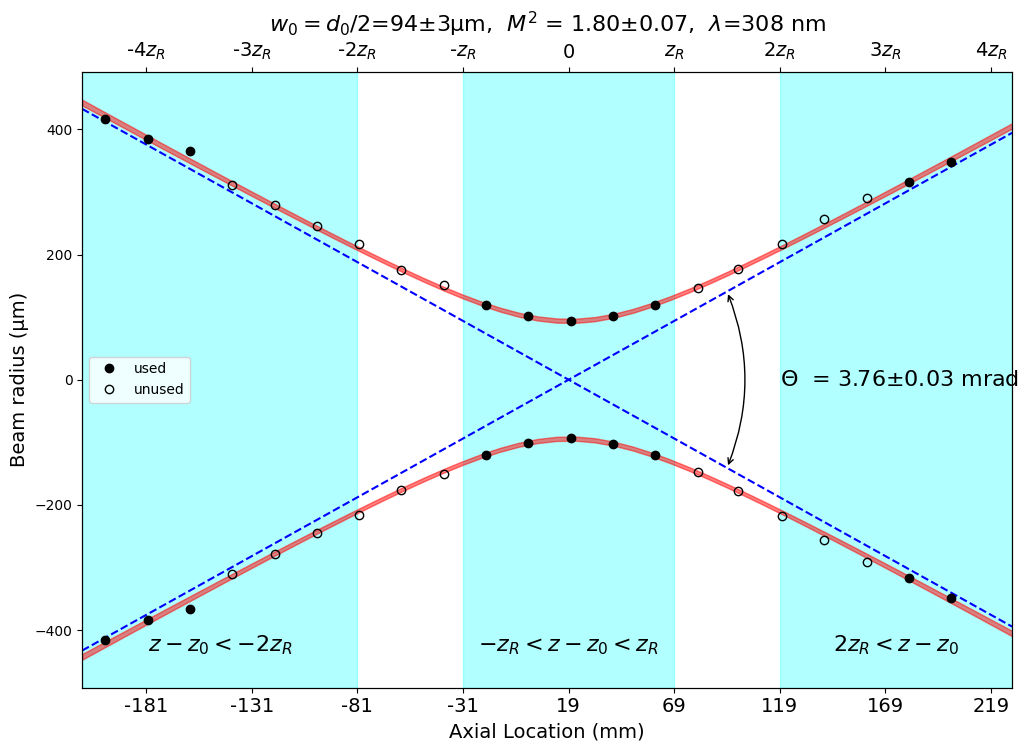

In [2]:
# datapoints digitized by hand from the graph above
# https://www.rp-photonics.com/beam_quality.html
lambda1 = 308e-9
z1_all = (
    np.array(
        [
            -200,
            -180,
            -160,
            -140,
            -120,
            -100,
            -80,
            -60,
            -40,
            -20,
            0,
            20,
            40,
            60,
            80,
            99,
            120,
            140,
            160,
            180,
            200,
        ]
    )
    * 1e-3
)
d1_all = (
    2
    * np.array(
        [
            416,
            384,
            366,
            311,
            279,
            245,
            216,
            176,
            151,
            120,
            101,
            93,
            102,
            120,
            147,
            177,
            217,
            256,
            291,
            316,
            348,
        ]
    )
    * 1e-6
)

lbs.M2_radius_plot(z1_all, d1_all, lambda1, strict=True)

## Example 2

Here is an example from a paper by Jiang in [High Power Laser Science and Engineering](https://www.cambridge.org/core/journals/high-power-laser-science-and-engineering/article/kwlevel-narrowlinewidth-linearly-polarized-fiber-laser-with-excellent-beam-quality-through-compact-onestage-amplification-scheme/66A7EE5D7B629066C7C55263F8500E44/core-reader).  Despite a good fit, the M² values generated using `laserbeamsize` do not agree with the published values.  This is troubling because the low M² values are a major point of the paper.  I finally decided that they just included the wrong graph (since all the labels were obviously added afterwards.)
    
<img src="https://static.cambridge.org/binary/version/id/urn:cambridge.org:id:binary:20180206103826606-0625:S2095471917000317:S2095471917000317_fig8g.gif" width="50%">


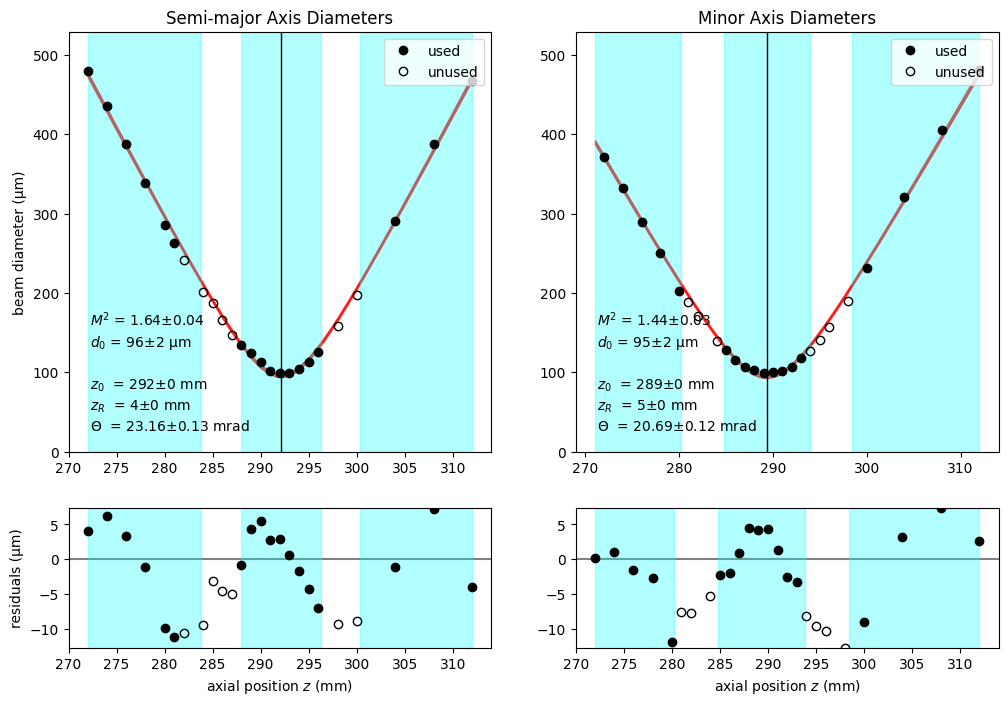

In [3]:
# datapoints digitized by hand from the graph above
lambda2 = 1064.36e-9
z2 = (
    np.array(
        [
            272,
            274,
            276,
            278,
            280,
            281,
            282,
            284,
            285,
            286,
            287,
            288,
            289,
            290,
            291,
            292,
            293,
            294,
            295,
            296,
            298,
            300,
            304,
            308,
            312,
        ]
    )
    * 1e-3
)
dx2 = (
    np.array(
        [
            479,
            436,
            388,
            339,
            286,
            263,
            242,
            201,
            187,
            166,
            147,
            134,
            124,
            113,
            102,
            99,
            99,
            104,
            113,
            125,
            158,
            198,
            291,
            388,
            467,
        ]
    )
    * 1e-6
)
dy2 = (
    np.array(
        [
            371,
            332,
            290,
            250,
            203,
            189,
            171,
            140,
            128,
            115,
            107,
            103,
            99,
            100,
            102,
            107,
            118,
            127,
            141,
            157,
            190,
            231,
            321,
            405,
            481,
        ]
    )
    * 1e-6
)

lbs.M2_diameter_plot(z2, dx2, lambda2, d_minor=dy2, strict=True)
plt.show()

## Example 3

A paper by Mirzaeian applies the M² formalism to [characterize thermal lensing](https://www.researchgate.net/publication/277680470_A_simple_technique_for_accurate_characterization_of_thermal_lens_in_solid_state_lasers) in a Yb$^{+3}$-doped KYW laser emitting from 1010-1070nm.  

Only the data from the graph on the right side of Figure 4 is examined, but the results match exactly.  This is also a nice example because the M² values agree.

<img src="https://www.researchgate.net/profile/Arkady_Major/publication/277680470/figure/fig1/AS:294285166563329@1447174459408/Laser-output-beam-quality-M-2-at-1-W-and-3-W-output-power.png" width="100%">

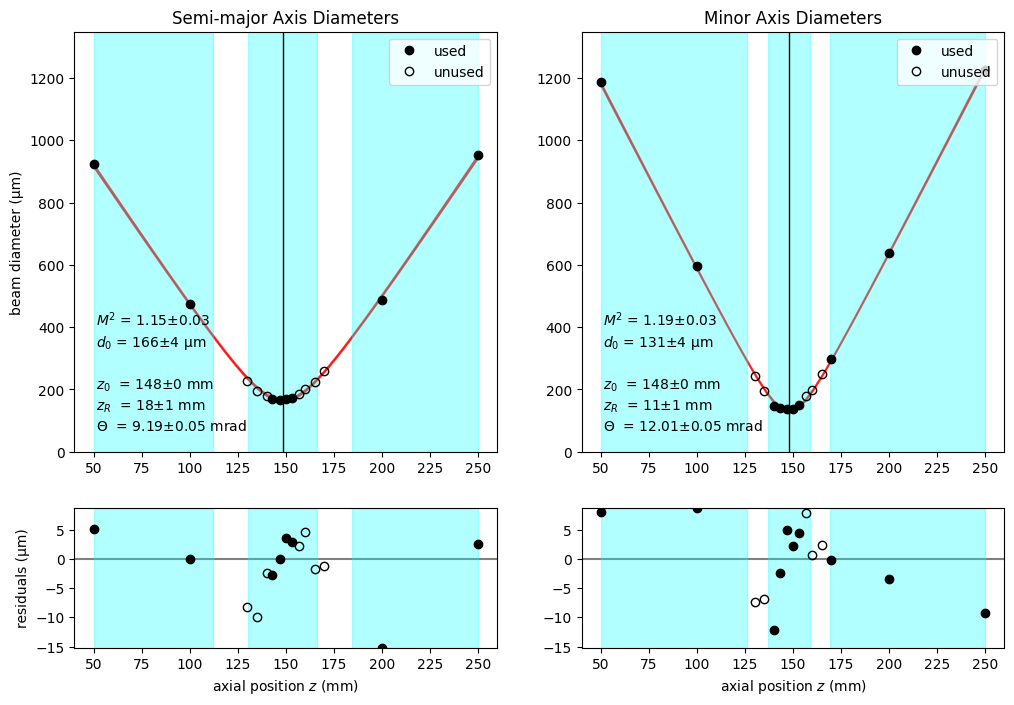

In [4]:
# datapoints digitized by hand from the graph above
lambda3 = 1040e-9

z3 = (
    np.array(
        [
            5.0,
            10.0,
            13.0,
            13.5,
            14.0,
            14.3,
            14.7,
            15.0,
            15.3,
            15.7,
            16.0,
            16.5,
            17.0,
            20.0,
            25.0,
        ]
    )
    * 1e-2
)
dy3 = 2 * np.array([594, 298, 121, 97, 74, 70, 68, 68, 75, 90, 99, 124, 149, 319, 613]) * 1e-6
dx3 = 2 * np.array([462, 237, 114, 98, 90, 85, 83, 85, 87, 93, 101, 112, 129, 244, 476]) * 1e-6

lbs.M2_diameter_plot(z3, dx3, lambda3, d_minor=dy3, strict=True)
plt.show()

## Example 4

[Ophir](https://www.ophiropt.com) sells beam scanners.  They posted a screen shot of their software that contains the digitized beam diameters and the derived beam parameters.  `laserbeamsize` fits the data and arrives at the same results (all except for the location $z_0$, which I suspect has something to do with how they define 0mm in the laboratory).

This example also exposed the need to start the fitting process with approximately correct values.  Once that was done, `laserbeamsize.beam_fit()` matched those from the NanoModeScan software.

<img src="https://www.ophiropt.com/user_files/laser/beam_profilers/M2_Beam_Propagation_8.gif">

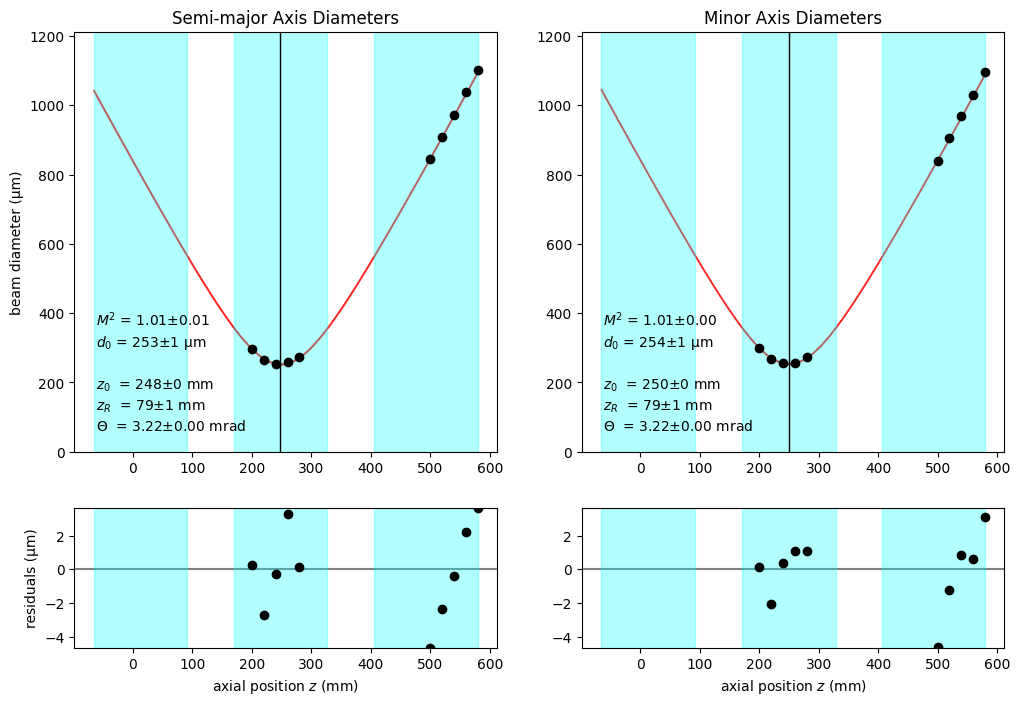

        Ophir     laserbeamsize
M2x      1.01      1.01 ± 0.01 
M2y      1.01      1.01 ± 0.01

d0x       539       549 ± 3 µm
d0y       537       545 ± 3 µm

Thetax   1.51      1.48 ± 0 mrad
Thetay   1.52      1.50 ± 0 mrad

z0x       930       427 ± 6 mm
z0y       935       429 ± 4 mm

zRx       357       370 ± 5 mm
zRy       353       363 ± 4 mm


In [5]:
# datapoints copied by hand from the table above
lambda4 = 633e-9
f4 = 200e-3  # focal length of lens
d_scan_head = 100e-3
z4 = np.array([100, 120, 140, 160, 180, 400, 420, 440, 460, 480]) * 1e-3 + d_scan_head
dx4 = np.array([297, 266, 254, 259, 273, 845, 909, 973, 1038, 1102]) * 1e-6
dy4 = np.array([300, 269, 256, 257, 273, 840, 905, 969, 1031, 1096]) * 1e-6

lbs.M2_diameter_plot(z4, dx4, lambda4, d_minor=dy4, strict=True)
plt.show()

params, errors, used = lbs.M2_fit(z4, dx4, lambda4)
o_paramsx, o_errorsx = lbs.artificial_to_original(params, errors, f4)
d0x, z0x, Thetax, M2x, zRx = o_paramsx
d0x_std, z0x_std, Thetax_std, M2x_std, zRx_std = o_errorsx

params, errors, used = lbs.M2_fit(z4, dy4, lambda4)
o_paramsy, o_errorsy = lbs.artificial_to_original(params, errors, f4)
d0y, z0y, Thetay, M2y, zRy = o_paramsy
d0y_std, z0y_std, Thetay_std, M2y_std, zRy_std = o_errorsy

print("        Ophir     laserbeamsize")
print("M2x      1.01      %.2f ± %.2f " % (M2x, M2x_std))
print("M2y      1.01      %.2f ± %.2f" % (M2y, M2y_std))
print()
print("d0x       539       %.0f ± %.0f µm" % (d0x * 1e6, d0x_std * 1e6))
print("d0y       537       %.0f ± %.0f µm" % (d0y * 1e6, d0y_std * 1e6))
print()
print("Thetax   1.51      %.2f ± %.0f mrad" % (Thetax * 1e3, Thetax_std * 1e3))
print("Thetay   1.52      %.2f ± %.0f mrad" % (Thetay * 1e3, Thetay_std * 1e3))
print()
print("z0x       930       %.0f ± %.0f mm" % (z0x * 1e3, z0x_std * 1e3))
print("z0y       935       %.0f ± %.0f mm" % (z0y * 1e3, z0y_std * 1e3))
print()
print("zRx       357       %.0f ± %.0f mm" % (zRx * 1e3, zRx_std * 1e3))
print("zRy       353       %.0f ± %.0f mm" % (zRy * 1e3, zRy_std * 1e3))

## Example 5

Another example that I think came from Ophir Optics.  The focused beam waist and divergence match within error. To match the M² result, a wavelength of 620nm was needed.  

The focal length of the focusing lens was assumed to be 300mm.  Reasonably close agreement was achieved although extrapolated values for the laser beam waist are reversed

<img src="https://vertassets.blob.core.windows.net/image/69821974/69821974-8ba6-4ab0-857a-090f324375f0/os021616_01hi.jpg">

In [6]:
# these values were digitized by hand from the above graph
z5 = (
    np.array(
        [
            220,
            240,
            260,
            280,
            300,
            320,
            340,
            350,
            360,
            370,
            380,
            390,
            400,
            410,
            420,
            430,
            440,
            450,
            460,
            470,
            480,
            500,
            540,
            580,
            620,
        ]
    )
    * 1e-3
)
dx5 = (
    np.array(
        [
            1758,
            1591,
            1431,
            1265,
            1111,
            963,
            823,
            740,
            687,
            633,
            568,
            510,
            469,
            426,
            398,
            394,
            394,
            419,
            455,
            512,
            560,
            689,
            972,
            1274,
            1584,
        ]
    )
    * 1e-6
)
dy5 = (
    np.array(
        [
            1614,
            1487,
            1330,
            1133,
            996,
            857,
            740,
            673,
            609,
            595,
            526,
            478,
            440,
            406,
            385,
            382,
            383,
            419,
            449,
            499,
            550,
            668,
            917,
            1207,
            1503,
        ]
    )
    * 1e-6
)

lambda5 = 620e-9  # wavelength of laser
f5 = 300e-3  # focal length of lens

paramsx, errorsx, used = lbs.M2_fit(z5, dx5, lambda5, strict=True)
paramsy, errorsy, used = lbs.M2_fit(z5, dy5, lambda5, strict=True)

d0x, z0x, Thetax, M2x, zRx = paramsx
d0y, z0y, Thetay, M2y, zRy = paramsy

d0x_std, z0x_std, Thetax_std, M2x_std, zRx_std = errorsx
d0y_std, z0y_std, Thetay_std, M2y_std, zRy_std = errorsy

print("Artificial focus")
print("      Expected         lbs")
print("M2x      3.92      %.2f ± %.2f " % (M2x, M2x_std))
print("M2y      3.55      %.2f ± %.2f" % (M2y, M2y_std))

print("d0x       390       %.0f ± %.0f µm" % (d0x * 1e6, d0x_std * 1e6))
print("d0y       381       %.0f ± %.0f µm" % (d0y * 1e6, d0y_std * 1e6))
print("Thetax   8.10      %.2f ± %.0f mrad" % (Thetax * 1e3, Thetax_std * 1e3))

o_paramsx, o_errorsx = lbs.artificial_to_original(paramsx, errorsx, f5)
o_paramsy, o_errorsy = lbs.artificial_to_original(paramsy, errorsy, f5)

d0x, z0x, Thetax, M2x, zRx = o_paramsx
d0y, z0y, Thetay, M2y, zRy = o_paramsy

d0x_std, z0x_std, Thetax_std, M2x_std, zRx_std = o_errorsx
d0y_std, z0y_std, Thetay_std, M2y_std, zRy_std = o_errorsy

print()
print("Original Beam")
print("      Expected         lbs")
print("M2x      3.92      %.2f ± %.2f " % (M2x, M2x_std))
print("M2y      3.55      %.2f ± %.2f" % (M2y, M2y_std))

print("d0x       869       %.0f ± %.0f µm" % (d0x * 1e6, d0x_std * 1e6))
print("d0y       880       %.0f ± %.0f µm" % (d0y * 1e6, d0y_std * 1e6))
print("Thetax   3.64      %.2f ± %.0f mrad" % (Thetax * 1e3, Thetax_std * 1e3))
print("Thetay   3.25      %.2f ± %.0f mrad" % (Thetay * 1e3, Thetay_std * 1e3))

print("z0x       930       %.0f ± %.0f mm" % (z0x * 1e3, z0x_std * 1e3))
print("z0y       935       %.0f ± %.0f mm" % (z0y * 1e3, z0y_std * 1e3))
print("zRx       239       %.0f ± %.0f mm" % (zRx * 1e3, zRx_std * 1e3))
print("zRy       271       %.0f ± %.0f mm" % (zRy * 1e3, zRy_std * 1e3))

Artificial focus
      Expected         lbs
M2x      3.92      4.00 ± 0.03 
M2y      3.55      3.60 ± 0.07
d0x       390       391 ± 3 µm
d0y       381       378 ± 7 µm
Thetax   8.10      8.09 ± 0 mrad

Original Beam
      Expected         lbs
M2x      3.92      4.00 ± 0.03 
M2y      3.55      3.60 ± 0.07
d0x       869       845 ± 6 µm
d0y       880       832 ± 15 µm
Thetax   3.64      3.74 ± 0 mrad
Thetay   3.25      3.42 ± 0 mrad
z0x       930       908 ± 0 mm
z0y       935       913 ± 0 mm
zRx       239       226 ± 3 mm
zRy       271       243 ± 10 mm


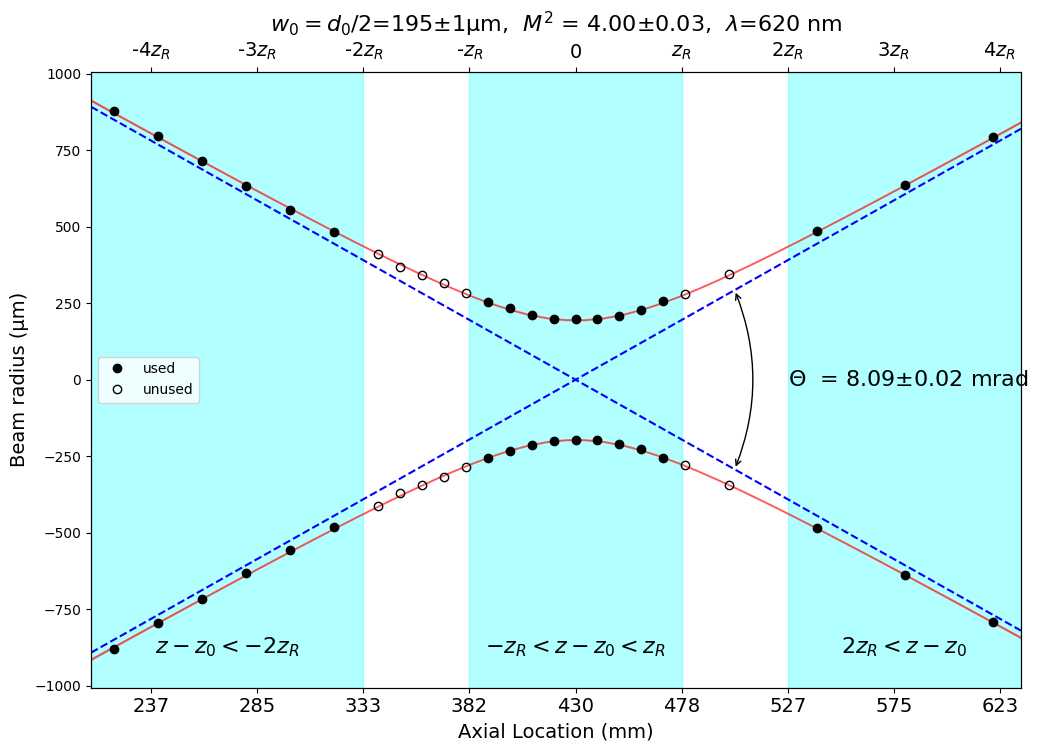

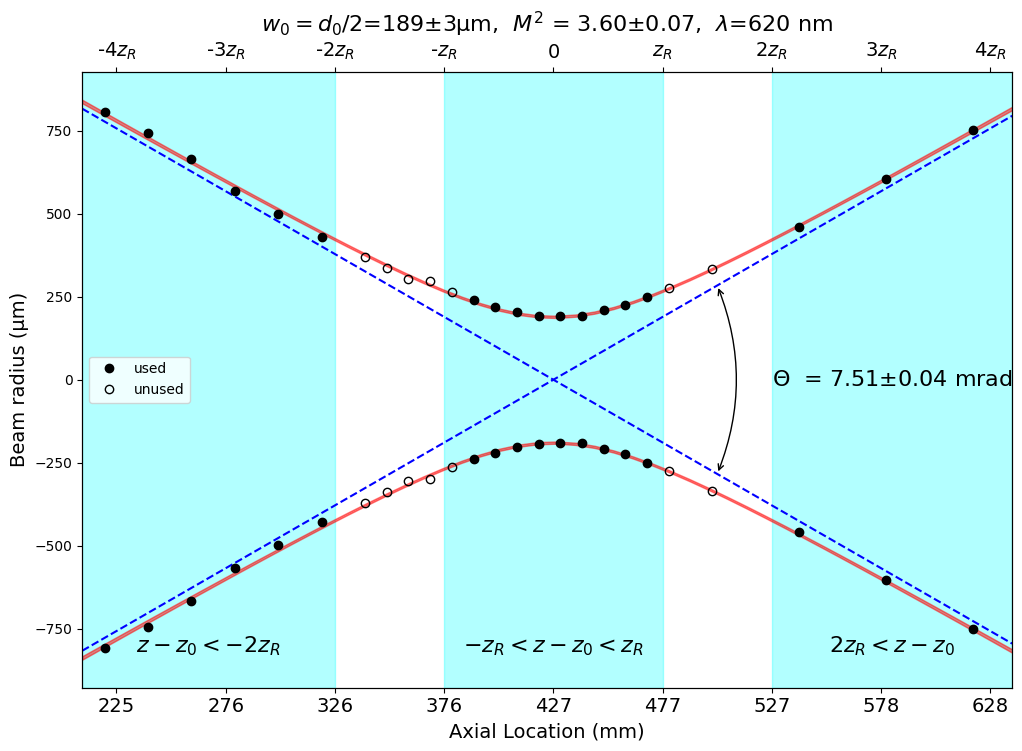

Beam propagation parameters derived from hyperbolic fit
Beam Propagation Ratio of the focused beam
        M2 = 3.79 ± 0.07
       M2x = 4.00 ± 0.03
       M2y = 3.60 ± 0.06
Beam waist diameter of the focused beam
        d0 = 384 ± 6 µm
       d0x = 391 ± 2 µm
       d0y = 378 ± 6 µm
Beam waist location of the focused beam
        z0 = 428 ± 1 mm
       z0x = 430 ± 0 mm
       z0y = 427 ± 1 mm
Rayleigh Length of the focused beam
        zR = 49 ± 2 mm
       zRx = 48 ± 1 mm
       zRy = 50 ± 2 mm
Divergence Angle of the focused beam
     theta = 7.80 ± 0.05 milliradians
   theta_x = 8.09 ± 0.02 milliradians
   theta_y = 7.51 ± 0.04 milliradians
Beam parameter product of the focused beam
       BPP = 0.75 ± 0.01 mm * mrad
     BPP_x = 0.79 ± 0.01 mm * mrad
     BPP_y = 0.71 ± 0.01 mm * mrad



In [7]:
lbs.M2_radius_plot(z5, dx5, lambda5, strict=True)
plt.show()

lbs.M2_radius_plot(z5, dy5, lambda5, strict=True)
plt.show()

print(lbs.M2_report(z5, dx5, lambda5, d_minor=dy5, f=f5))